# lesson learned

In [38]:
import pandas as pd
import numpy as np

In [2]:
pwd

'C:\\Users\\kjh96\\Github\\공모전'

In [8]:
cd C:/Users/kjh96/Github/공모전/data

C:\Users\kjh96\Github\공모전\data


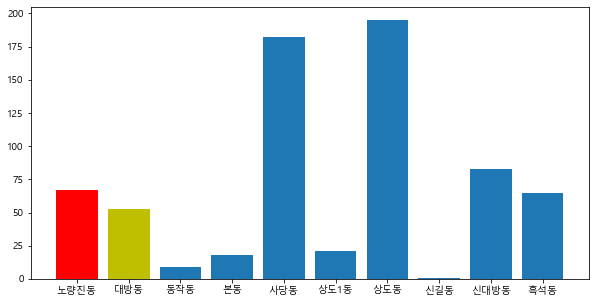

In [62]:
# 1. bar chart 특정부분 컬러링

# 인덱스 정렬 및 열 삭제
cct = pd.read_excel("정제 데이터/cct_tb.xlsx").reset_index(drop=True).drop(["Unnamed: 0"], axis=1)
cct.head()

# 그래프 삽입 모듈 및 그래프 내 한글 폰트 삽입 코드
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import matplotlib.pyplot as plt
 
plt.figure(figsize=(10,5))
 
barlist=plt.bar(cct["EMD_NM"], cct["관리기관명"])
barlist[0].set_color('r')
barlist[1].set_color('y')

#plt.savefig('demo.png')

In [63]:
# 2. 데이터 재구조화

from pandas import DataFrame
data = DataFrame({'cust_ID' : ['C_001', 'C_001', 'C_002', 'C_002'],
                  'prd_CD' : ['P_001', 'P_002', 'P_001', 'P_002'],
                  'pch_cnt' : [1, 2, 3, 4],
                  'pch_amt' : [100, 200, 300, 400]})
data

,cust_ID,prd_CD,pch_cnt,pch_amt
0,C_001,P_001,1,100
1,C_001,P_002,2,200
2,C_002,P_001,3,300
3,C_002,P_002,4,400


In [48]:
data_melt = pd.melt(data, id_vars=['cust_ID', 'prd_CD'], var_name='pch_CD', value_name='pch_value')
data_melt

,cust_ID,prd_CD,pch_CD,pch_value
0,C_001,P_001,pch_cnt,1
1,C_001,P_002,pch_cnt,2
2,C_002,P_001,pch_cnt,3
3,C_002,P_002,pch_cnt,4
4,C_001,P_001,pch_amt,100
5,C_001,P_002,pch_amt,200
6,C_002,P_001,pch_amt,300
7,C_002,P_002,pch_amt,400


In [51]:
data_melt_pivot = pd.pivot_table(data_melt, 
                                 index=['cust_ID', 'prd_CD'],
                                 columns='pch_CD', values='pch_value',
                                 aggfunc=np.mean)
data_melt_pivot

pch_CD          pch_amt  pch_cnt
cust_ID prd_CD                  
C_001   P_001       100        1
        P_002       200        2
C_002   P_001       300        3
        P_002       400        4

In [ ]:
# 3. 데이터 읽기

# encoding= "utf8"로 인코딩이 잘 안될 경우
pd.read_csv("./data/data.csv", encoding= "utf8-sig")

In [65]:
# 4. pd.get_dummies를 이용한 One-hot 인코딩

animal = pd.DataFrame({'name':['duck', 'lion', 'dog', 'cat', np.nan],
                      'color':['red', 'yellow', 'red', 'green', np.nan]}) 
animal

,name,color
0,duck,red
1,lion,yellow
2,dog,red
3,cat,green
4,NaN,NaN


In [57]:
pd.get_dummies(animal['name'])

,cat,dog,duck,lion
0,0,0,1,0
1,0,0,0,1
2,0,1,0,0
3,1,0,0,0
4,0,0,0,0


In [ ]:
# 5. 스케일링

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = scaler.fit_transform(df)

In [ ]:
# 6.1. KMeans SSE 확인
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
plt.figure(figsize=(12, 6))

def elbow(X):
    sse = []

    for i in range(1,10):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,10), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(new_df)

In [ ]:
# 6.2. KMeans 클러스터링
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 4

model = KMeans(n_clusters=k,algorithm='auto')
model.fit(new_df)
predict = pd.DataFrame(model.predict(new_df))
predict.columns=['predict']

In [ ]:
# 7.1 차원 축소
from sklearn.decomposition import PCA
plt.figure(figsize=(12, 8))

pca = PCA(n_components=2)
X = pca.fit_transform(new_df)
y_pred = model.labels_
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='rainbow')
plt.show()